In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path1 = 'Marylebone_AirQualityDataHourly_2018-2021_clean.csv'
path2 = 'Rochester_AirQualityDataHourly_2018-2021_clean.csv'
path3 = 'Weather_data_hourly_Heathrow-Airport.csv'

In [3]:
##creating the main dataframes for each path as time series 
urban_air = pd.read_csv(path1, skiprows=4, sep=',', parse_dates=['Date Time'], na_values='No data')
rural_air = pd.read_csv(path2, skiprows=4, sep=',', parse_dates=['Date Time'], na_values='No data')
heathrow = pd.read_csv(path3, sep=',', parse_dates=['Date_Hour'], na_values='No data')


#setting the date time col as the main index 
urban_air.set_index(["Date Time"], inplace=True)
rural_air.set_index(["Date Time"], inplace=True)
heathrow.set_index(["Date_Hour"], inplace = True)

urban_air.head()

,Hour of Day,Day of Week,PM10 particulate matter (Hourly measured),Status PM10,PM2.5 particulate matter (Hourly measured),Status PM2.5,Nitrogen dioxide,Status NO2
Date Time,,,,,,,,
2018-01-01 00:00:00,0,6,NaN,N ugm-3 (TEOM FDMS),NaN,V ugm-3 (TEOM FDMS),NaN,V ugm-3
2018-01-01 01:00:00,1,0,24.6,V ugm-3 (TEOM FDMS),12.7,V ugm-3 (TEOM FDMS),79.05960,V ugm-3
2018-01-01 02:00:00,2,0,18.7,V ugm-3 (TEOM FDMS),11.6,V ugm-3 (TEOM FDMS),97.05587,V ugm-3
2018-01-01 03:00:00,3,0,17.2,V ugm-3 (TEOM FDMS),7.6,V ugm-3 (TEOM FDMS),101.07355,V ugm-3
2018-01-01 04:00:00,4,0,10.8,V ugm-3 (TEOM FDMS),2.3,V ugm-3 (TEOM FDMS),81.56557,V ugm-3


# Part 1

# 1.1

## Average across entire time period

In [5]:
# creating data frames for PM10 mesurements at different locations 
urban_air_pm10 = urban_air['PM10 particulate matter (Hourly measured)']
rural_air_pm10 = rural_air['PM10 particulate matter (Hourly measured)']

# creating data frames for NO2 mesurements at different locations 
urban_air_gas = urban_air['Nitrogen dioxide']
rural_air_gas = rural_air['Nitrogen dioxide']


# creating data frames for PM2.5 mesurements at different locations 
urban_air_pm2 = urban_air['PM2.5 particulate matter (Hourly measured)']
rural_air_pm2 = rural_air['PM2.5 particulate matter (Hourly measured)']

# Calculating mean PM10 mesurements for all 3 years and mean of the difference in mesurements 
print(f"Average across Urban 3 Years: {urban_air_pm10.mean()}\nAverage across Rural 3 Years: {rural_air_pm10.mean()}\nAverage Difference {(urban_air_pm10 -rural_air_pm10).mean()}")

Average across Urban 3 Years: 20.93622107554624
Average across Rural 3 Years: 15.664442436607404
Average Difference 4.946374286878565


## Finding Yearly Differences

In [6]:
##finding yearly averages 
yearly_mean_urban = urban_air_pm10.resample('Y').mean()
yearly_mean_rural = rural_air_pm10.resample('Y').mean()
year_mean_diff = (abs(urban_air_pm10 - rural_air_pm10)).resample('Y').mean()

for i in range(4):
    print(f"Urban Year {2018+i} : {yearly_mean_urban[i]}\nRural Year {2018+i} : {yearly_mean_rural[i]}\nAverage difference Year {2018 +i} : {year_mean_diff[i]}\n\n")


Urban Year 2018 : 23.862891594751154
Rural Year 2018 : 17.44297974713182
Average difference Year 2018 : 9.333268680252305


Urban Year 2019 : 22.236206488278476
Rural Year 2019 : 14.953432534678436
Average difference Year 2019 : 9.388275419193722


Urban Year 2020 : 16.210678430179495
Rural Year 2020 : 14.926146995096362
Average difference Year 2020 : 6.163109417860409


Urban Year 2021 : 17.416503391107764
Rural Year 2021 : 13.885083451202265
Average difference Year 2021 : 5.752597735849057




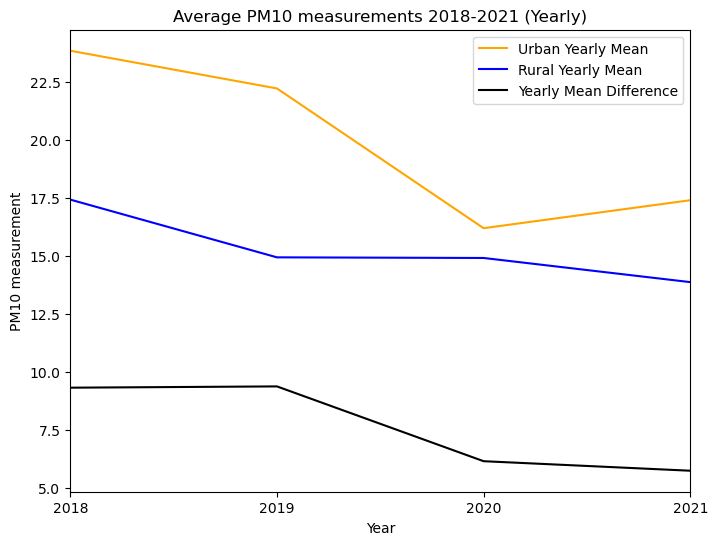

In [7]:
# Plotting yearly averages
fig1, ax1 = plt.subplots(figsize = (8,6))

yearly_mean_urban.plot(ax=ax1, label = 'Urban Yearly Mean', color = 'orange',alpha = 1)
yearly_mean_rural.plot(ax=ax1, label = 'Rural Yearly Mean', color = 'blue',alpha = 1)
year_mean_diff.plot(ax=ax1, label = 'Yearly Mean Difference', color = 'black',alpha = 1)

ax1.set_xlabel("Year")
ax1.set_ylabel("PM10 measurement")

ax1.set_title('Average PM10 measurements 2018-2021 (Yearly)')


ax1.legend()

## Finding Monthly Differences

In [8]:
##finding monthly averages 
monthly_mean_urban = urban_air_pm10.resample('M').mean()
monthly_mean_rural = rural_air_pm10.resample('M').mean()

monthly_mean_diff = (abs(urban_air_pm10-rural_air_pm10)).resample('M').mean()

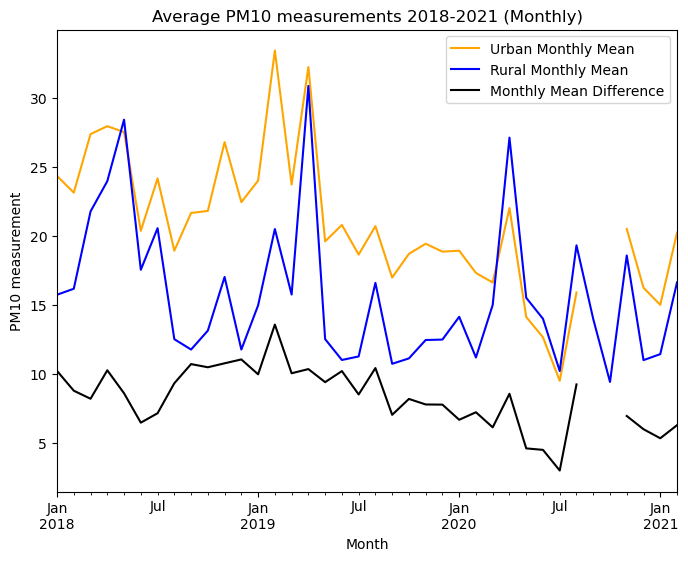

In [9]:
#plotting monthly averages for all 3 years 
fig2, ax2 = plt.subplots(figsize = (8,6))

monthly_mean_urban.plot(ax=ax2, label = 'Urban Monthly Mean', color = 'orange',alpha = 1)
monthly_mean_rural.plot(ax=ax2, label = 'Rural Monthly Mean', color = 'blue',alpha = 1)
monthly_mean_diff.plot(ax=ax2, label = 'Monthly Mean Difference', color = 'black',alpha = 1)


ax2.set_xlabel("Month")
ax2.set_ylabel("PM10 measurement")

ax2.set_title('Average PM10 measurements 2018-2021 (Monthly)')


ax2.legend()

# 1.2

## Nitrogen impact on PM10 measurement 6am Vs 6pm 

In [10]:
## PM10 mesurements 

# creating a data frame of the specific times needed 
mean_urbanPM10_6am_to_6pm = urban_air_pm10.between_time('06:00', '18:00')
mean_ruralPM10_6am_to_6pm = rural_air_pm10.between_time('06:00', '18:00')

# grouping by hour and calculating the mean for each hour
hourly_means_urbanPM10 = mean_urbanPM10_6am_to_6pm.groupby(mean_urbanPM10_6am_to_6pm.index.hour).mean()
hourly_means_ruralPM10 = mean_ruralPM10_6am_to_6pm.groupby(mean_ruralPM10_6am_to_6pm.index.hour).mean()

In [11]:
## Gas Measurements

# creating a data frame of the specific times needed 
mean_urban_gas_6am_to_6pm = urban_air_gas.between_time('06:00', '18:00')
mean_rural_gas_6am_to_6pm = rural_air_gas.between_time('06:00', '18:00')

# grouping by hour and calculating the mean for each hour
hourly_means_urban_gas = mean_urban_gas_6am_to_6pm.groupby(mean_urban_gas_6am_to_6pm.index.hour).mean()
hourly_means_rural_gas = mean_rural_gas_6am_to_6pm.groupby(mean_rural_gas_6am_to_6pm.index.hour).mean()

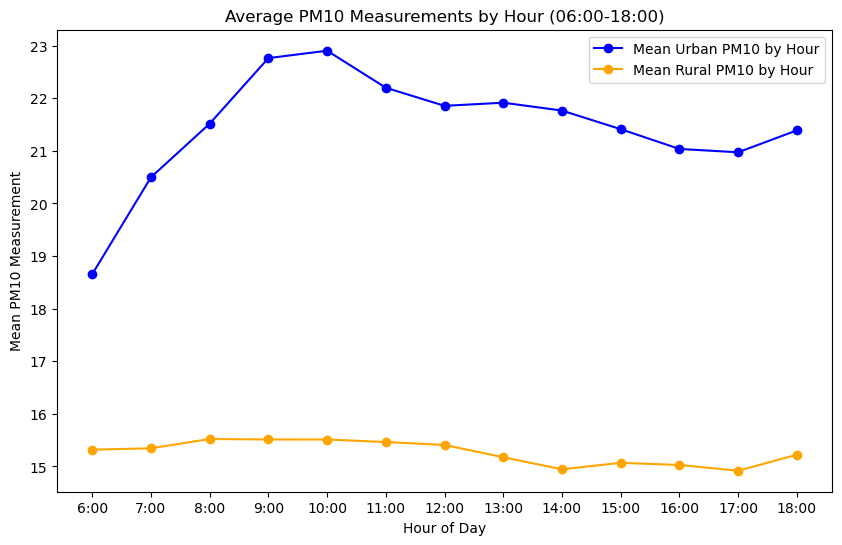

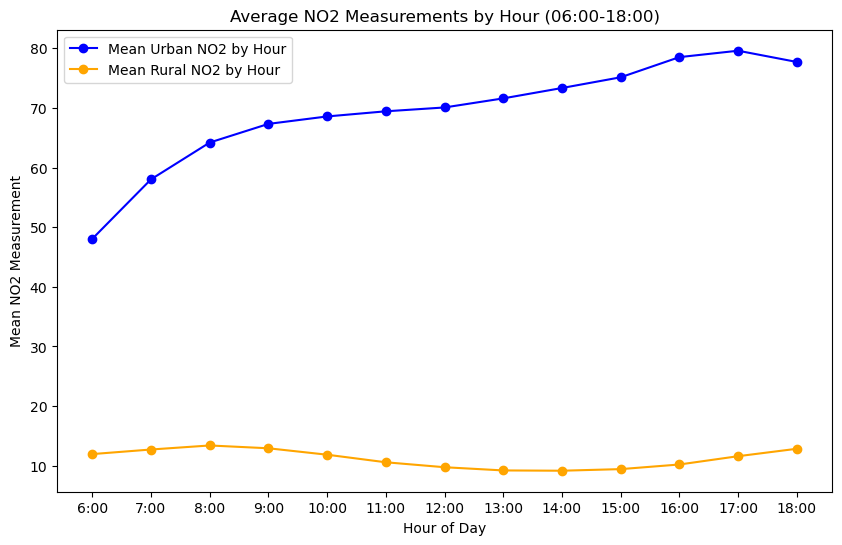

In [12]:
# Plotting PM10
fig3, ax3 = plt.subplots(figsize=(10,6))
hourly_means_urbanPM10.plot(ax=ax3, label='Mean Urban PM10 by Hour', color='blue', marker='o')
hourly_means_ruralPM10.plot(ax=ax3, label='Mean Rural PM10 by Hour', color='orange', marker='o')

ax3.set_xlabel("Hour of Day")
ax3.set_ylabel("Mean PM10 Measurement")
ax3.set_title('Average PM10 Measurements by Hour (06:00-18:00)')

# set x-ticks to show every hour between 6 AM and 6 PM
ax3.set_xticks(range(6, 19)) 
ax3.set_xticklabels([f'{i}:00' for i in range(6, 19)])  

ax3.legend()




#Plotting gas
fig4, ax4 = plt.subplots(figsize=(10,6))
hourly_means_urban_gas.plot(ax=ax4, label='Mean Urban NO2 by Hour', color='blue', marker='o')
hourly_means_rural_gas.plot(ax=ax4, label='Mean Rural NO2 by Hour', color='orange', marker='o')

ax4.set_xlabel("Hour of Day")
ax4.set_ylabel("Mean NO2 Measurement")
ax4.set_title('Average NO2 Measurements by Hour (06:00-18:00)')

# Set x-ticks to show every hour between 6 AM and 6 PM
ax4.set_xticks(range(6, 19))  
ax4.set_xticklabels([f'{i}:00' for i in range(6, 19)])

ax4.legend()

## All Hours of the day

In [13]:
## PM10 Measurements

# grouping by hour and calculating the mean for each hour
hourly_means_urbanPM10 = urban_air_pm10.groupby(urban_air_pm10.index.hour).mean()
hourly_means_ruralPM10 = rural_air_pm10.groupby(rural_air_pm10.index.hour).mean()



## Gas Measurements

# grouping by hour and calculating the mean for each hour
hourly_means_urban_gas = urban_air_gas.groupby(urban_air_gas.index.hour).mean()
hourly_means_rural_gas = rural_air_gas.groupby(rural_air_gas.index.hour).mean()


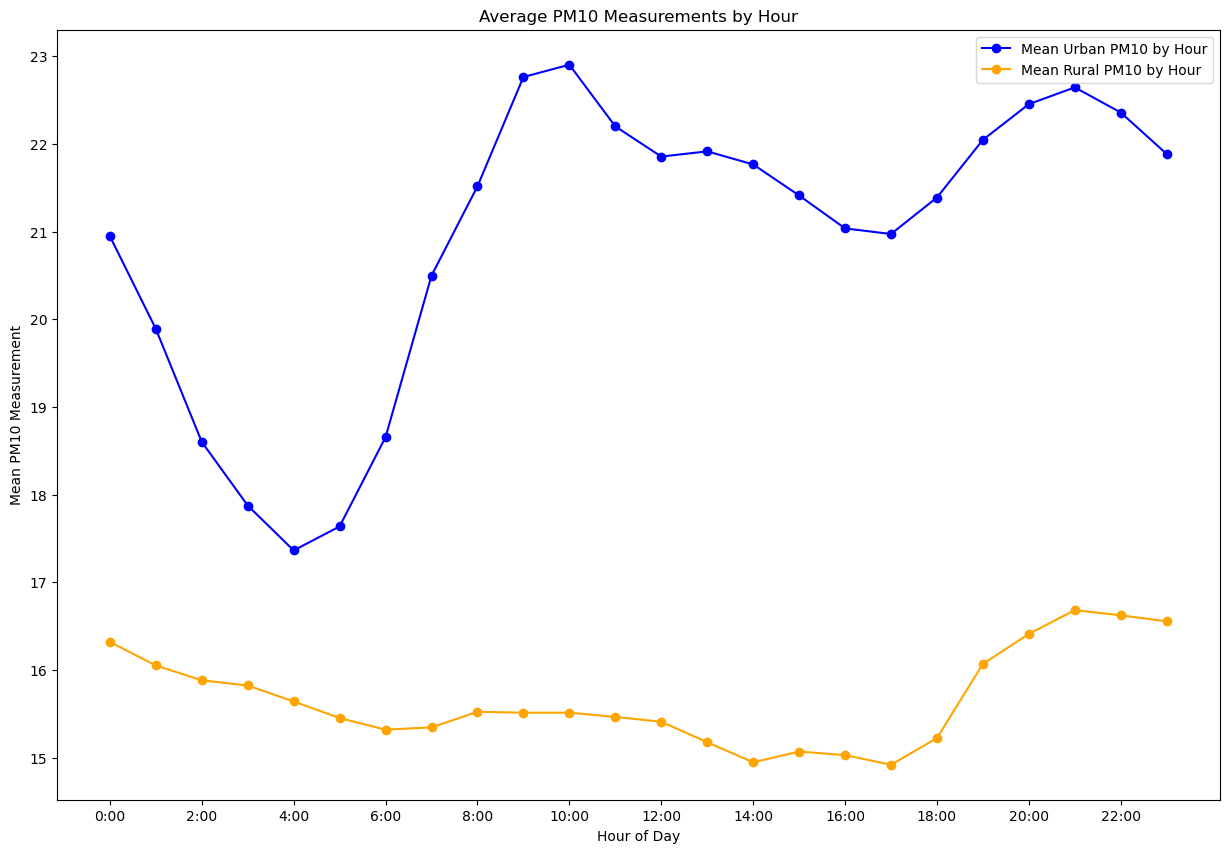

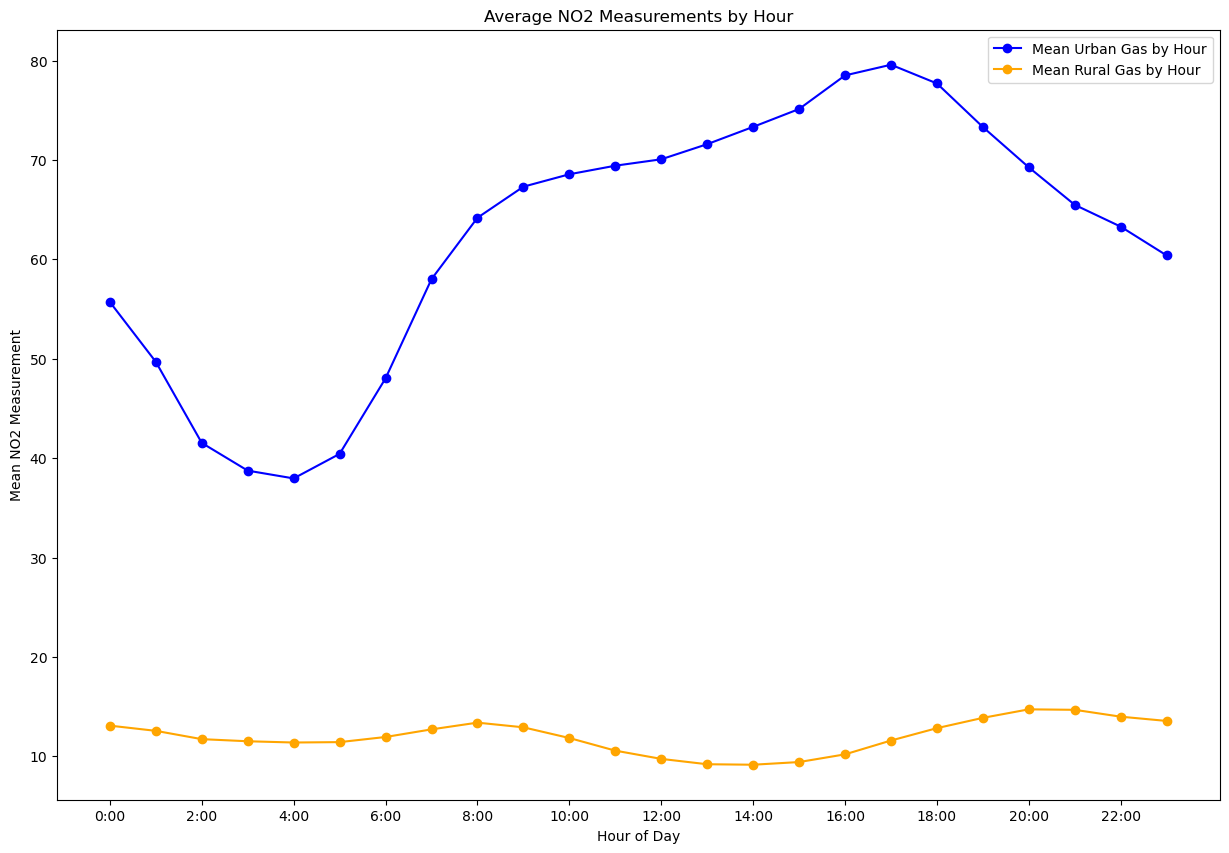

In [45]:
# Plotting PM10
fig5, ax5 = plt.subplots(figsize=(15,10))
hourly_means_urbanPM10.plot(ax=ax5, label='Mean Urban PM10 by Hour', color='blue', marker='o')
hourly_means_ruralPM10.plot(ax=ax5, label='Mean Rural PM10 by Hour', color='orange', marker='o')

ax5.set_xlabel("Hour of Day")
ax5.set_ylabel("Mean PM10 Measurement")
ax5.set_title('Average PM10 Measurements by Hour')

# Set x-ticks to show every hour
ax5.set_xticks(range(0, 24,2))
ax5.set_xticklabels([f'{i}:00' for i in range(0, 24,2)])

ax5.legend()





# Plotting gas
fig6, ax6 = plt.subplots(figsize=(15,10))
hourly_means_urban_gas.plot(ax=ax6, label='Mean Urban Gas by Hour', color='blue', marker='o')
hourly_means_rural_gas.plot(ax=ax6, label='Mean Rural Gas by Hour', color='orange', marker='o')

# Setting labels and title
ax6.set_xlabel("Hour of Day")
ax6.set_ylabel("Mean NO2 Measurement")
ax6.set_title('Average NO2 Measurements by Hour')

ax6.set_xticks(range(0, 24,2))
ax6.set_xticklabels([f'{i}:00' for i in range(0, 24,2)])

ax6.legend()


In [15]:
heathrow

,Temperature (degrees C),Precipitation (mm),Wind direction (degrees),Wind speed (km/h),Wind gust (km/h),Pressure (hPa)
Date_Hour,,,,,,
1948-12-01 00:00:00,1.9,NaN,NaN,0.0,NaN,NaN
1948-12-01 01:00:00,1.9,NaN,NaN,0.0,NaN,NaN
1948-12-01 02:00:00,1.9,NaN,NaN,0.0,NaN,NaN
1948-12-01 03:00:00,0.8,NaN,NaN,0.0,NaN,NaN
1948-12-01 04:00:00,1.3,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...
2021-02-28 19:00:00,7.4,0.0,30.0,8.0,24.1,1034.4
2021-02-28 20:00:00,6.9,0.0,40.0,9.0,24.1,1034.2
2021-02-28 21:00:00,6.5,0.0,60.0,15.0,22.2,1034.1


## Part 2

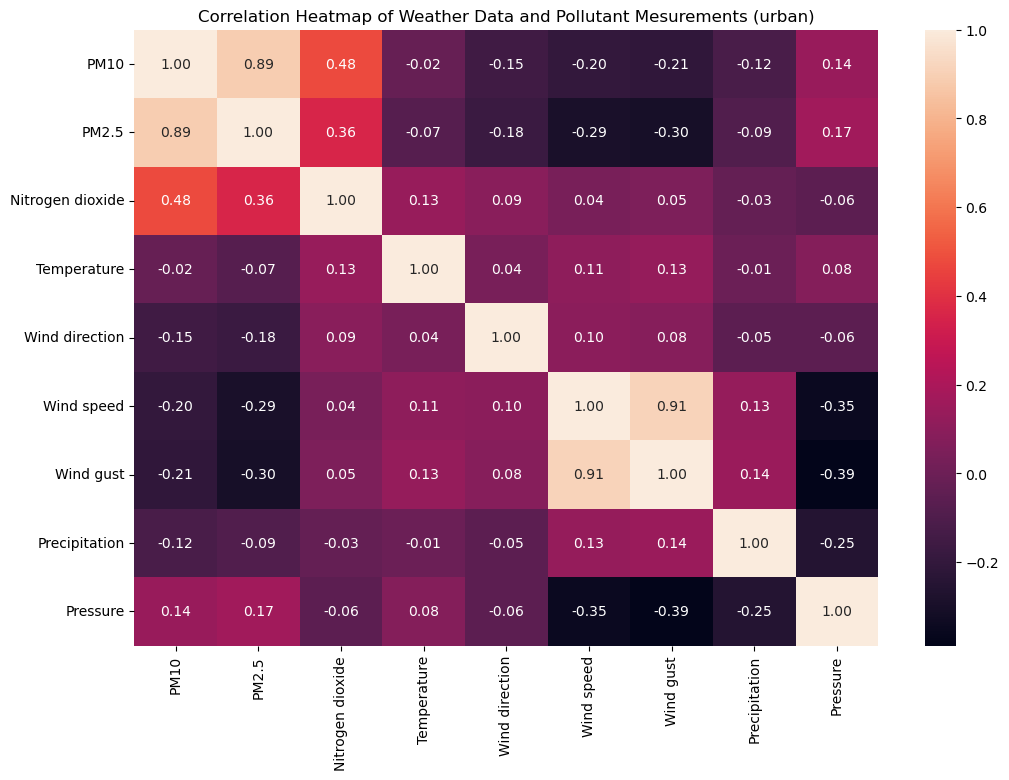

In [44]:
## Correlation for Urban Location

# data frame for weather properties 
weather_properties = pd.DataFrame({
    'Temperature': heathrow['Temperature (degrees C)'],
    'Wind direction': heathrow['Wind direction (degrees)'],
    'Wind speed': heathrow['Wind speed (km/h)'],
    'Wind gust': heathrow['Wind gust (km/h)'],
    'Precipitation' : heathrow['Precipitation (mm)'],
    'Pressure': heathrow['Pressure (hPa)'],},index=pd.date_range(start='2018-01-01',end='2021-02-28-23:00',freq='H'))

# data frame for pollutants properties 
pollutants_properties = pd.DataFrame({
    'PM10': urban_air_pm10,
    'PM2.5': urban_air_pm2,
    'Nitrogen dioxide': urban_air_gas,},index=pd.date_range(start='2018-01-01',end='2021-02-28-23:00',freq='H'))

#joining data frames
combined_df = pollutants_properties.join(weather_properties)

# making correlation matrix 
corr_matrix = combined_df.corr()

# generating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Weather Data and Pollutant Mesurements (urban)')
plt.show()


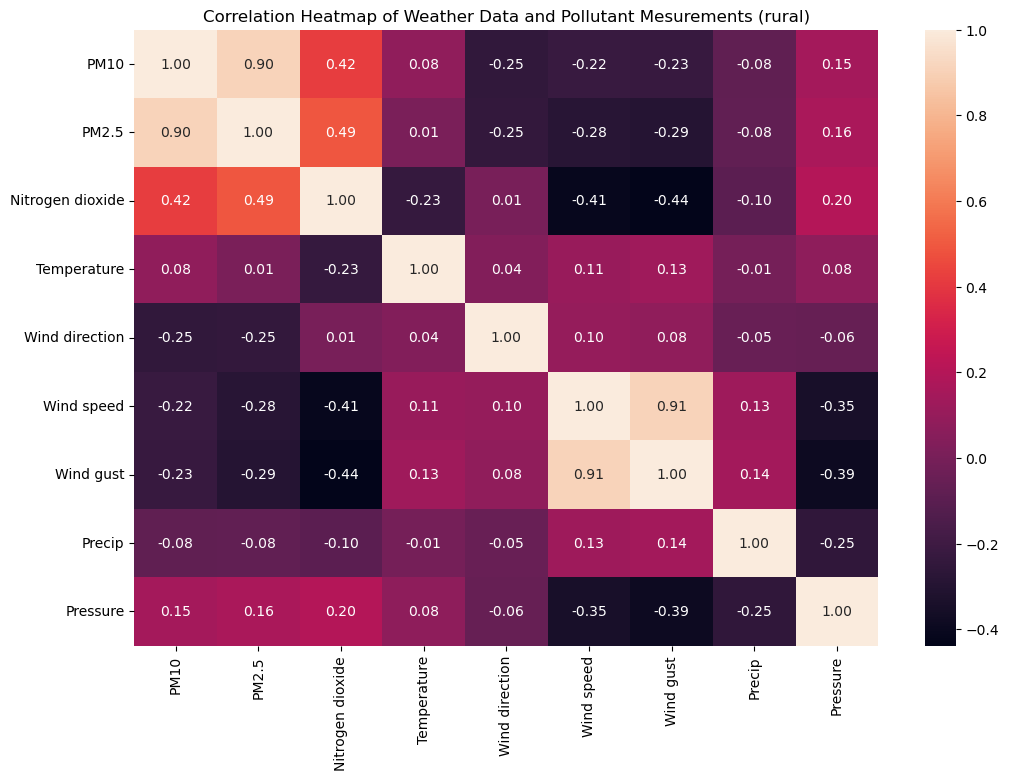

In [43]:
## Correlation for Rural Location


# data frame for weather properties 
weather_properties = pd.DataFrame({
    'Temperature': heathrow['Temperature (degrees C)'],
    'Wind direction': heathrow['Wind direction (degrees)'],
    'Wind speed': heathrow['Wind speed (km/h)'],
    'Wind gust': heathrow['Wind gust (km/h)'],
    'Precipitation' : heathrow['Precipitation (mm)'],
    'Pressure': heathrow['Pressure (hPa)'],},index=pd.date_range(start='2018-01-01',end='2021-02-28-23:00',freq='H'))


# data frame for pollutants properties 
pollutants_properties = pd.DataFrame({
    'PM10': rural_air_pm10,
    'PM2.5': rural_air_pm2,
    'Nitrogen dioxide': rural_air_gas,},index=pd.date_range(start='2018-01-01',end='2021-02-28-23:00',freq='H'))


#joining data frames
combined_df = pollutants_properties.join(weather_properties)


# making correlation matrix 
corr_matrix = combined_df.corr()

# generating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Weather Data and Pollutant Mesurements (rural)')
plt.show()